## Local recycling ratio in ERA5 

Fraction of total precipitation that derives from local surface evaporation rather than from advection. Important assumption: well-mixed atmosphere! (precip from advection vs. precip from local evaporation is approximately equal to moisture from advection vs. moisture from local recycling)

In the moisture budget analysis we use simply E/P as in indicator for local recycling. 

But: The bigger the considered domain -> the larger the local recycling rate. The physical processes and scales ared adressed by using a recycling ratio for each grid cell a a function of length scale (as in Trenberth, 1999). 


P(m)/P = EL/ (PL + F) 

where: P(m) is the precipitation from local evaporation, L the pre-defined length scale and F the vertically integrated mean horizontal moisture flux through a certain grid cell.

In [129]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

In [8]:
# define function as equation used in Trenberth, 1999: 
def local_recycling(E, P, F, L):
    return E * L / (P * L + F)

In [128]:
####  ERA5 data ####

f= '../moisture_transport/moisture_transport/cache/era5_monthlymean_clim_precip.nc'
precip = xr.open_dataset(f)
P = precip.tp.values[0]*1000
f= '../moisture_transport/moisture_transport/cache/era5_monthlymean_clim_evapo.nc'
evapo = xr.open_dataset(f)
E= evapo.e.values[0]* - 1000
f= '../moisture_transport/moisture_transport/tmpdir/monthly/awt_19982006_clim.nc'
qu= xr.open_dataset(f)['p71.162'].values[0]
qv = xr.open_dataset(f)['p72.162'].values[0]
awt = np.sqrt(qu**2 + qv**2)

#### WRF 9km ####
f= '/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/wrf_climatology.nc'
wrf= xr.open_dataset(f)
wrf_p = wrf.precip_g[0].values
wrf_e = wrf.WaterFlx[0].values 

## elevation for contour of TP 
import xarray
dem = '/media/juli/Data/projects/data/elevation/elevation_600x350.nc'
elevations = xarray.open_dataarray(dem)
la = elevations.lat.values
lo = elevations.lon.values

In [118]:
wrf500 = local_recycling(wrf_e, wrf_p, wrf_awt, L = 500)
era500 = local_recycling(E, P, awt, L = 1000)

/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


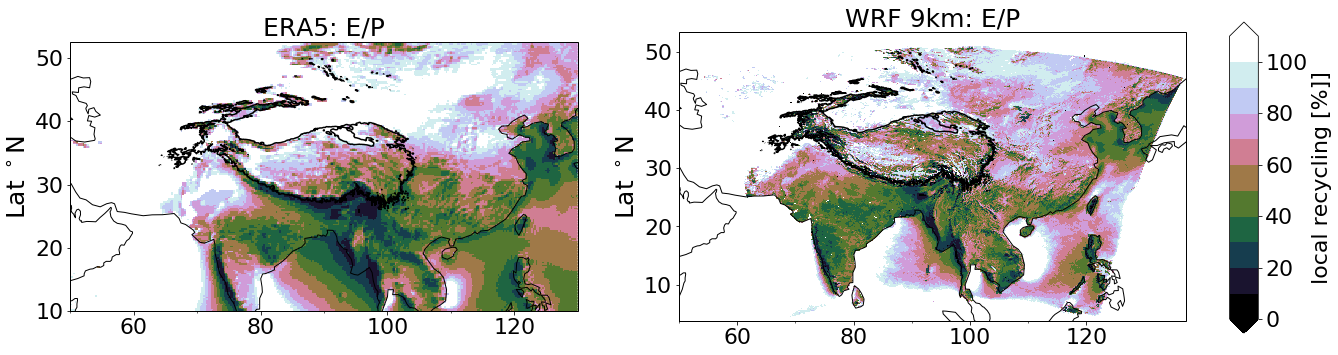

In [135]:
import matplotlib.colors as colors
import cartopy 
import cartopy.crs as ccrs

fig =plt.figure(figsize=(20,6))
xlabels=[50,60,70,80,90,100,110,120]
ylabels= [10,20,30,40,50]
fs= 25

# customizing of colorbar 
cmap=plt.cm.cubehelix
r = np.arange(0,120,10)

norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)
lons = wrf.lon.values
lats = wrf.lat.values

# P
ax1 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
ax1.pcolormesh(lons, lats, wrf_e/ wrf_p * 100,norm = norm, cmap = cmap  )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'WRF 9km: E/P', fontsize= fs)
# axis labels 
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)

#### ERA5 ##### 
lons = precip.longitude.values
lats = precip.latitude.values

ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
m=ax1.pcolormesh(lons, lats, E/P *100,norm = norm, cmap = cmap  )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'ERA5: E/P', fontsize= fs)
# axis labels 
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)

cb_ax1 = fig.add_axes([0.93, 0.14,0.02, 0.72])
cbar = fig.colorbar(m, cax=cb_ax1, extend = 'both', label = 'local recycling [%]]')
plt.rcParams.update({'font.size': 22})

plt.savefig('plots/local_recycling.png')
plt.show()

## Local recycling for different length scales 

In [76]:
rr50 = local_recycling(E, P, awt, L = 50)
rr100 = local_recycling(E, P, awt, L = 100)
rr500 = local_recycling(E, P, awt, L = 500)
rr1000 = local_recycling(E, P, awt, L = 1000)

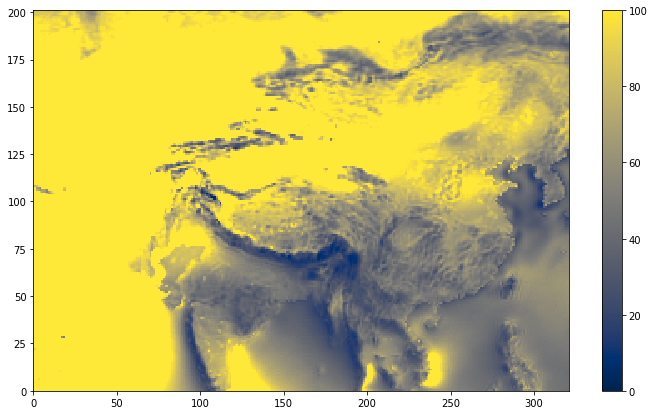

In [68]:
plt.figure(figsize= (12,7))
plt.pcolormesh(np.flip(E/P*100 , axis = 0), vmin = 0, vmax = 100, cmap = 'cividis')
plt.colorbar()

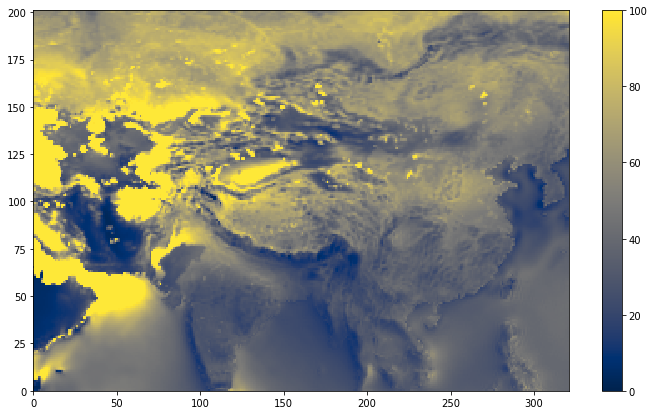

In [75]:
plt.figure(figsize= (12,7))
plt.pcolormesh(np.flip(rr50 * 100 , axis = 0), vmin = 0, vmax = 100, cmap= 'cividis')
plt.colorbar()

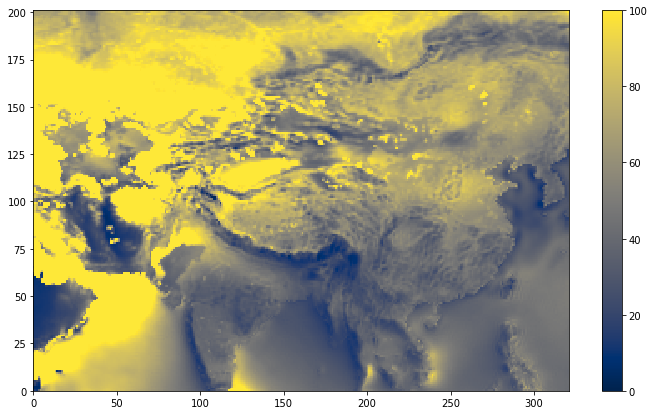

In [73]:
plt.figure(figsize= (12,7))
plt.pcolormesh(np.flip(rr100 * 100 , axis = 0), vmin = 0, vmax = 100, cmap= 'cividis')
plt.colorbar()

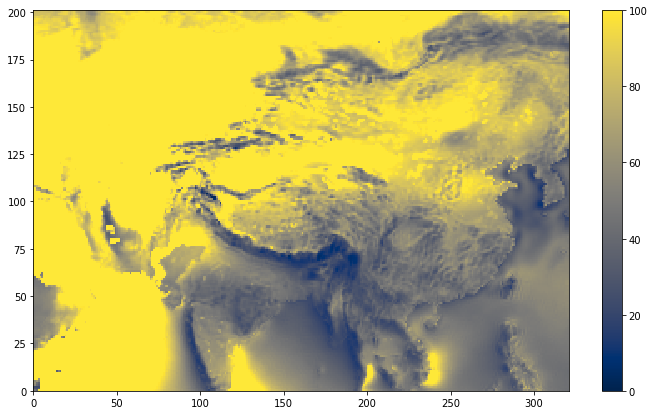

In [74]:
plt.figure(figsize= (12,7))
plt.pcolormesh(np.flip(rr500*100, axis = 0), vmin = 0, vmax = 100, cmap = 'cividis')
plt.colorbar()

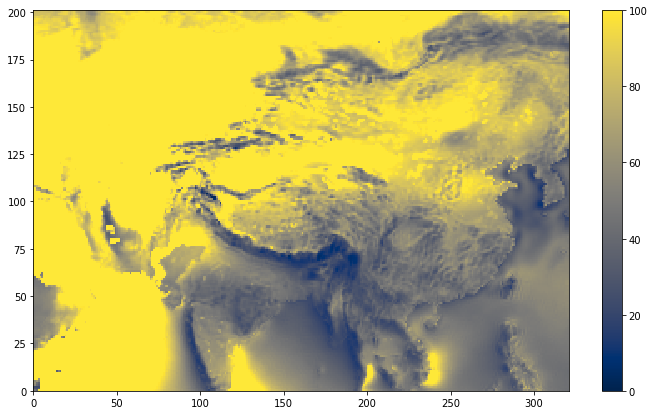

In [77]:
plt.figure(figsize= (12,7))
plt.pcolormesh(np.flip(rr500*100, axis = 0), vmin = 0, vmax = 100, cmap = 'cividis')
plt.colorbar()